### Student Information
Name: 黃鈺臻

Student ID: 10962330

GitHub ID: VickyHuang1113

---

## Part 1: Take home exercises
Do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

In [1]:
# construct dataframe
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
                                  
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# Answer here
# Try Boolean indexing
X_athe = X[X['category_name'] == 'alt.atheism']
print(X_athe.shape)

(480, 3)


### Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
# Answer here
for i in range(len(NA_df['missing_example'])):
    print("Type: ", type(NA_df['missing_example'][i]), ", isnull: ", NA_df['missing_example'].isnull()[i])

# 填寫 'NaN', 'None', '' 這三個值時，人可以辨識出他代表資料遺失，
# 但是對電腦而言他是有接收到string的，所以不會被算成null / missing value

Type:  <class 'float'> , isnull:  True
Type:  <class 'float'> , isnull:  True
Type:  <class 'str'> , isnull:  False
Type:  <class 'str'> , isnull:  False
Type:  <class 'NoneType'> , isnull:  True
Type:  <class 'str'> , isnull:  False


### Exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
# Answer here
X_sample = X.sample(n=1000,random_state=42)
X_sample_100 = X.sample(n=100,random_state=42)

x_ratio = []
x_sample100_ratio = []
x_sample1000_ratio = []
for c in categories: 
    x_ratio.append(len(X[X['category_name']==c]) / len(X))
    x_sample1000_ratio.append(len(X_sample[X_sample['category_name']==c]) / len(X_sample))
    x_sample100_ratio.append(len(X_sample_100[X_sample_100['category_name']==c]) / len(X_sample_100))

print(x_ratio)
print(x_sample100_ratio)
print(x_sample1000_ratio)

# 樣本和母體的分布會不一樣。但隨著sample數量增加，可以期望分布會變得更像。
# 如sample 1000次比起sample 100次就和母體有更相似的分布。

[0.21267168808152415, 0.2653965440850687, 0.25875055383252105, 0.2631812140008861]
[0.26, 0.27, 0.25, 0.22]
[0.206, 0.27, 0.247, 0.277]


### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

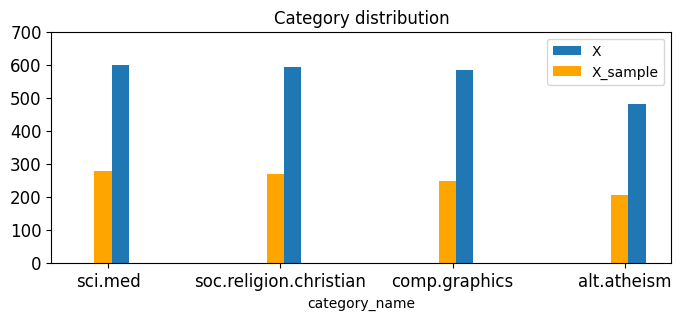

In [8]:
# Answer here
plt.figure(figsize=(8, 3))

X['category_name'].value_counts().plot(kind='bar', title='Category distribution', ylim=[0, 700], rot=0, fontsize=12, width=0.1, position=-0.2, label='X')
X_sample['category_name'].value_counts().plot(kind='bar', ylim=[0, 700], rot=0, fontsize=12, width=0.1, position=0.8, color='orange', label='X_sample')

plt.legend()

plt.show()

### Exercise 10
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)

(2257, 35788)


In [10]:
# Answer here
pos = np.where(X_counts[4, 0:100].toarray()[0]==1)[0]
# [0] 是用來去掉size==1的dimension的
print(pos)

count_vect.get_feature_names_out()[pos[1]]

[ 0 37]


'01'

### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

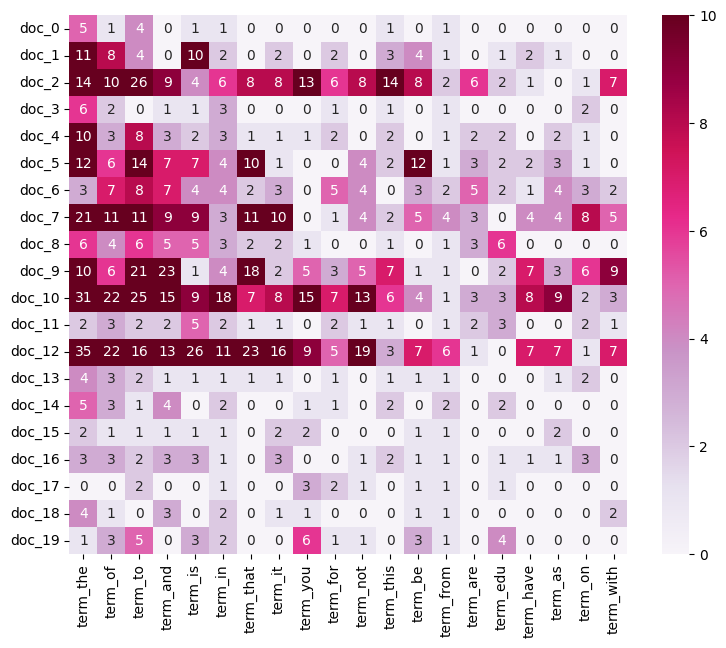

In [11]:
# Answer here
# 只畫出現頻續最高的20個詞彙 和前二十份文件的圖

import seaborn as sns

term_freq = np.array(X_counts.sum(axis=0)).ravel()
top_term_idx = np.argsort(term_freq)[::-1][:20]

plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top_term_idx]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, top_term_idx].toarray() #X_counts[how many documents, how many terms]
# print(plot_x)
# print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

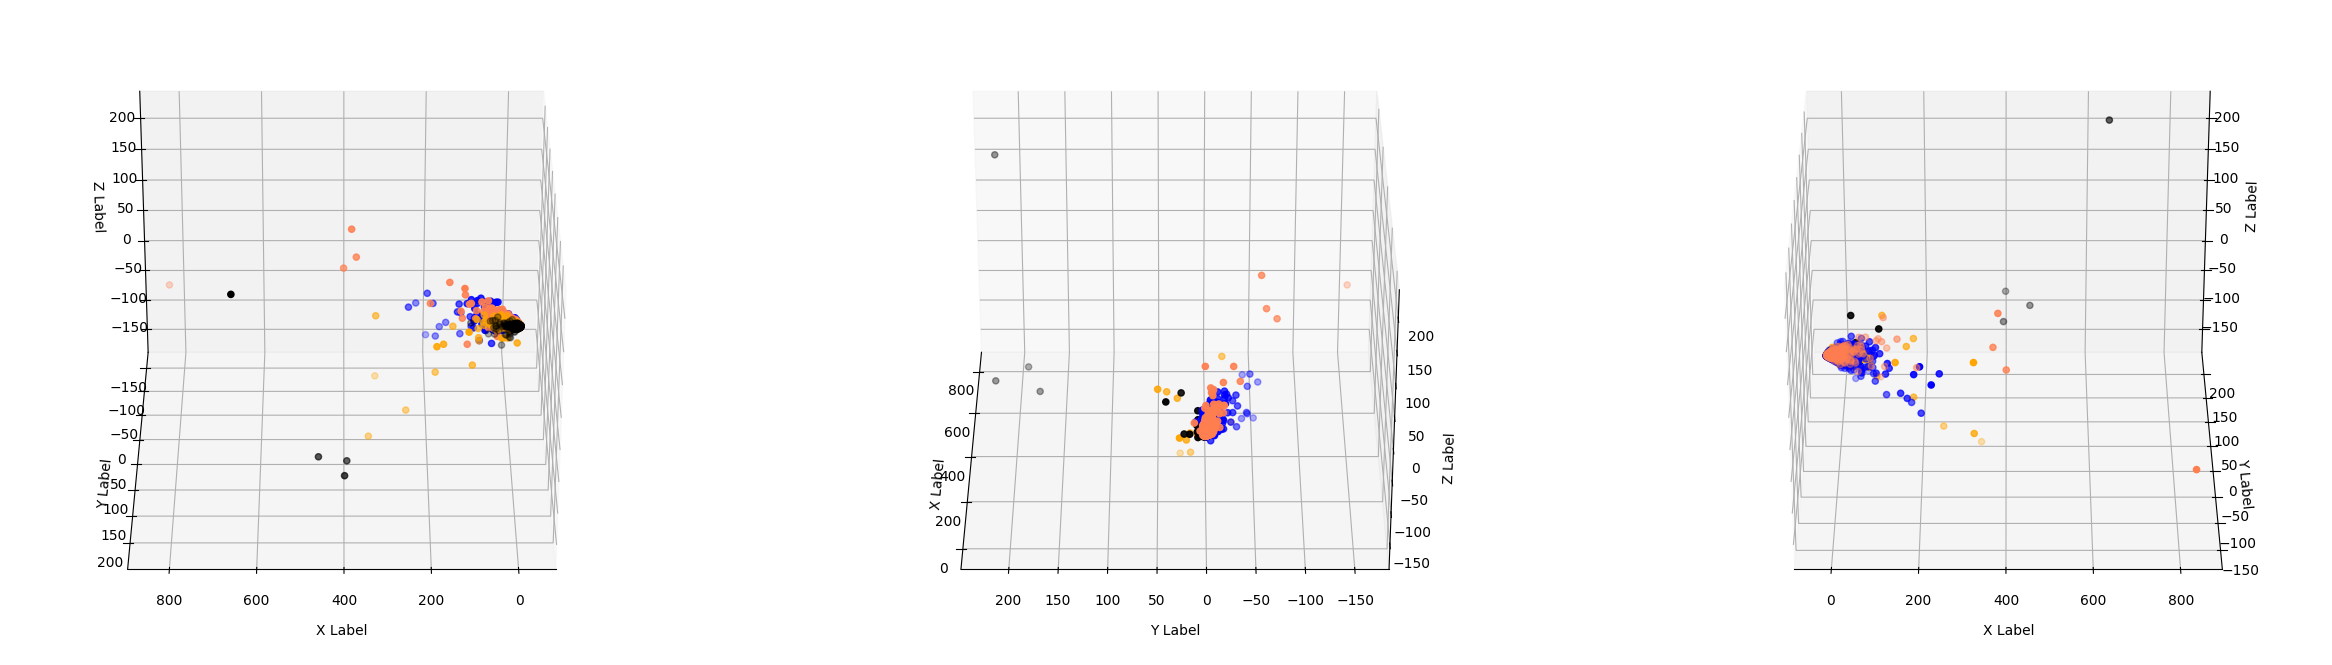

In [14]:
# Answer here

from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d.axes3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
plots = fig.subfigures(1, 3)

for plot, azim in zip(plots, [90, 180, 270]):
    ax = plot.add_subplot(projection='3d')
    ax.view_init(elev=30, azim=azim)
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, marker='o', color=c, label=category)
    
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

plt.show()

# 相比2D的時候可以保留更多資訊、觀察出更多資訊。
# 如綠 粉兩群是在不同的dimension上遠離其他群的，在2D圖就看不出來。

### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [13]:
# Answer here

import plotly.express as px

term_freq = np.asarray(X_counts.sum(axis=0))[0]

word_freq = pd.DataFrame({'Words': count_vect.get_feature_names_out()[:300], 'Frequency': term_freq[:300]})

fig = px.bar(word_freq, x='Words', y='Frequency', labels={'Words': 'Words', 'Frequency': 'Frequency'})
fig.update_xaxes(tickangle=45)  # 轉成更好觀察的角度
fig.show()

### Exercise 14
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


C:\Users\d1063\AppData\Local\Temp\ipykernel_1156\835854342.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'echinacea'),
 Text(1, 0, 'stodolsky'),
 Text(2, 0, 'liability'),
 Text(3, 0, 'gks'),
 Text(4, 0, 'omnivorous'),
 Text(5, 0, 'collapse'),
 Text(6, 0, 'wiley'),
 Text(7, 0, 'pathways'),
 Text(8, 0, 'arrangement'),
 Text(9, 0, 'doctrinaire'),
 Text(10, 0, 'khwaja'),
 Text(11, 0, 'tensions'),
 Text(12, 0, 'letterhead'),
 Text(13, 0, 'unarmed'),
 Text(14, 0, 'dls'),
 Text(15, 0, 'joubert'),
 Text(16, 0, 'themselves'),
 Text(17, 0, 'pole'),
 Text(18, 0, 'safely'),
 Text(19, 0, 'jagani')]

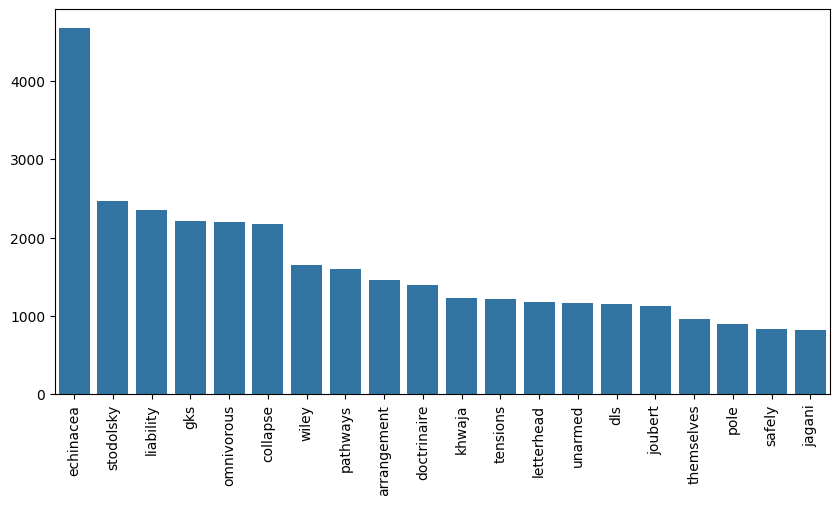

In [18]:
# Answer here

# 先去掉stop words 再畫頻率高的，比較有意義
count_vec_stop = CountVectorizer(stop_words='english')
X_counts_stop = count_vec_stop.fit_transform(X.text) 
term_freq_stop = np.asarray(X_counts_stop.sum(axis=0))[0]


plt.subplots(figsize=(10, 5))

term_freq = np.array(X_counts_stop.sum(axis=0)).ravel()
top_term_idx = np.argsort(term_freq)[::-1][:20]

g = sns.barplot(x=count_vec_stop.get_feature_names_out()[top_term_idx], 
            y=term_freq_stop[top_term_idx])
g.set_xticklabels(count_vect.get_feature_names_out()[top_term_idx], rotation = 90)

### Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

C:\Users\d1063\AppData\Local\Temp\ipykernel_1156\3868538801.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'echinacea'),
 Text(1, 0, 'stodolsky'),
 Text(2, 0, 'liability'),
 Text(3, 0, 'gks'),
 Text(4, 0, 'omnivorous'),
 Text(5, 0, 'collapse'),
 Text(6, 0, 'wiley'),
 Text(7, 0, 'pathways'),
 Text(8, 0, 'arrangement'),
 Text(9, 0, 'doctrinaire'),
 Text(10, 0, 'khwaja'),
 Text(11, 0, 'tensions'),
 Text(12, 0, 'letterhead'),
 Text(13, 0, 'unarmed'),
 Text(14, 0, 'dls'),
 Text(15, 0, 'joubert'),
 Text(16, 0, 'themselves'),
 Text(17, 0, 'pole'),
 Text(18, 0, 'safely'),
 Text(19, 0, 'jagani')]

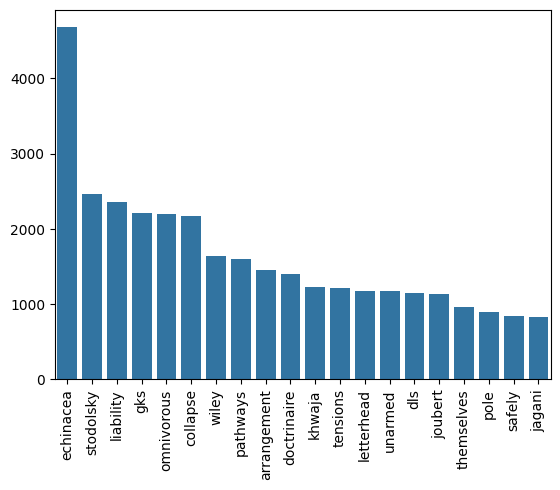

In [19]:
# Answer here

# 上一個exercise 已經用頻率排了，此題答案同上題
g = sns.barplot(x=count_vec_stop.get_feature_names_out()[top_term_idx], 
            y=term_freq_stop[top_term_idx])
g.set_xticklabels(count_vect.get_feature_names_out()[top_term_idx], rotation = 90)

### Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [21]:
# Answer here

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
# 用category name也可以
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## Part 2 Practice on New Dataset
Follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__  

- Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.  
- You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.  

In [53]:
# Form dataframe with "pd.DataFrame.from_records"

doc_list = []
file_list = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
records = []

# 1. Reading files 
for file_name in file_list:
    doc = []
    dir = "./sentiment_labelled_sentences/" + file_name
    file = open(dir, 'r')
    for line in file:
        doc.append(line)
    doc_list.append(doc)

# 2. Parsing each line
for i in range(len(file_list)):
    file_id = i
    file_name = file_list[i].strip(".txt")
    for line in doc_list[i]:
        x = x+1
        line = " ".join(line.split("\t")) 
        # 最後一個分數有可能用 \t 或 " " 隔開，這裡統一換成" "
        splitted_line = line.split(" ")

        sentiment = int(splitted_line[-1])
        text = " ".join(splitted_line[:-1])

        # 因為有多個file, 所以除了內容外也存file_id
        records.append([text, sentiment, file_id, file_name])

# 3. Transform records into dataframe
X_sen = pd.DataFrame.from_records(records, columns= ['text', 'sentiment', 'file_id', 'file_name'])
X_sen[:5]

,text,sentiment,file_id,file_name
0,So there is no way for me to plug it in here i...,0,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,0,amazon_cells_labelled
2,Great for the jawbone.,1,0,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,0,amazon_cells_labelled
4,The mic is great.,1,0,amazon_cells_labelled


In [58]:
print(len(X_sen))
print(len(X_sen.text))

print("--------Exercise 1--------")
for t in X_sen.text[:3]:
    print(t)

print("--------Exercise 2--------")
X_positive = X_sen[X_sen['sentiment'] == 1][:5]
X_positive

3000
3000
--------Exercise 1--------
So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
--------Exercise 2--------


,text,sentiment,file_id,file_name
1,"Good case, Excellent value.",1,0,amazon_cells_labelled
2,Great for the jawbone.,1,0,amazon_cells_labelled
4,The mic is great.,1,0,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,0,amazon_cells_labelled
10,And the sound quality is great.,1,0,amazon_cells_labelled


In [62]:
print("--------Exercise 3--------")
X_sen[X_sen['file_name'] == 'imdb_labelled'].iloc[:10][0:5]

--------Exercise 3--------


,text,sentiment,file_id,file_name
1000,"A very, very, very slow-moving, aimless movie ...",0,1,imdb_labelled
1001,Not sure who was more lost - the flat characte...,0,1,imdb_labelled
1002,Attempting artiness with black & white and cle...,0,1,imdb_labelled
1003,Very little music or anything to speak of.,0,1,imdb_labelled
1004,The best scene in the movie was when Gerardo i...,1,1,imdb_labelled


In [69]:
print("--------Exercise 4--------")
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

print("--------Exercise 5, 6--------")
print("是觀念題,跟資料集無關(答案不變)所以不重複做")

--------Exercise 4--------
--------Exercise 5--------
是觀念題 跟資料集無關所以不重複做


--------Exercise 7 --------
111
sentiment
1    111
0     89
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

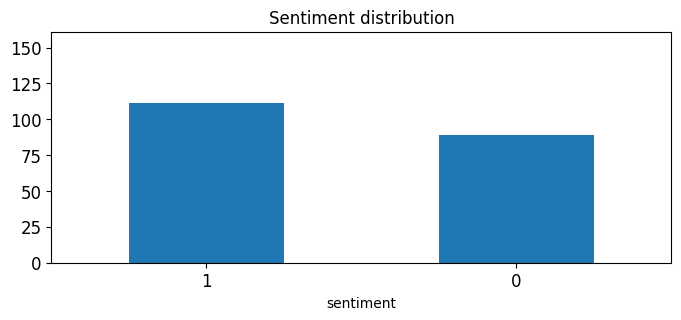

In [70]:
print("--------Exercise 7 --------")
X_sen_sample = X_sen.sample(n=200,random_state=42)
print(max(X_sen_sample.sentiment.value_counts()))
upper_bound = max(X_sen_sample.sentiment.value_counts() + 50) 
print(X_sen_sample.sentiment.value_counts())

X_sen_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

--------Exercise 8 --------


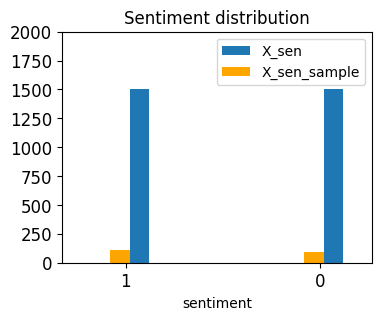

In [73]:
print("--------Exercise 8 --------")
plt.figure(figsize=(4, 3))

X_sen['sentiment'].value_counts().plot(kind='bar', title='Sentiment distribution', ylim=[0, 2000], rot=0, fontsize=12, width=0.1, position=-0.2, label='X_sen')
X_sen_sample['sentiment'].value_counts().plot(kind='bar', ylim=[0, 2000], rot=0, fontsize=12, width=0.1, position=0.8, color='orange', label='X_sen_sample')

plt.legend()

plt.show()

In [76]:
print("--------Exercise 9 --------")

sen_count_vect = CountVectorizer()
X_sen_counts = sen_count_vect.fit_transform(X_sen.text) 

analyze = count_vect.build_analyzer()
analyze(" ".join(list(X_sen[:1].text)))

print("--------More Exercise--------")
print("後面都是把X換成X_sen而已，技巧不變，apply new dataset時最需要注意、變化的部分在讀檔那邊而已")

--------Exercise 9 --------
--------More Exercise--------
後面都是把X換成X_sen而已，技巧不變，apply new dataset時最需要注意、變化的部分在讀檔那邊而已
